<h1>Credit Card Fraud Detection </h1>

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
warnings.filterwarnings('ignore') 

In [2]:
dataset=pd.read_csv("creditcard.csv")
dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset["Class"].value_counts() #this shows that the data is highly imbalanced

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
# Determine number of fraud cases in dataset
fraud = dataset[dataset['Class'] == 1]
valid = dataset[dataset['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print("Outlier Fraction: ",outlierFraction)
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

Outlier Fraction:  0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [7]:
print("Amount details of the fraudulent transaction")
fraud["Amount"].describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
print("Amount details of the fraudulent transaction")
valid["Amount"].describe()

Amount details of the fraudulent transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<h3>Data Visualization</h3>

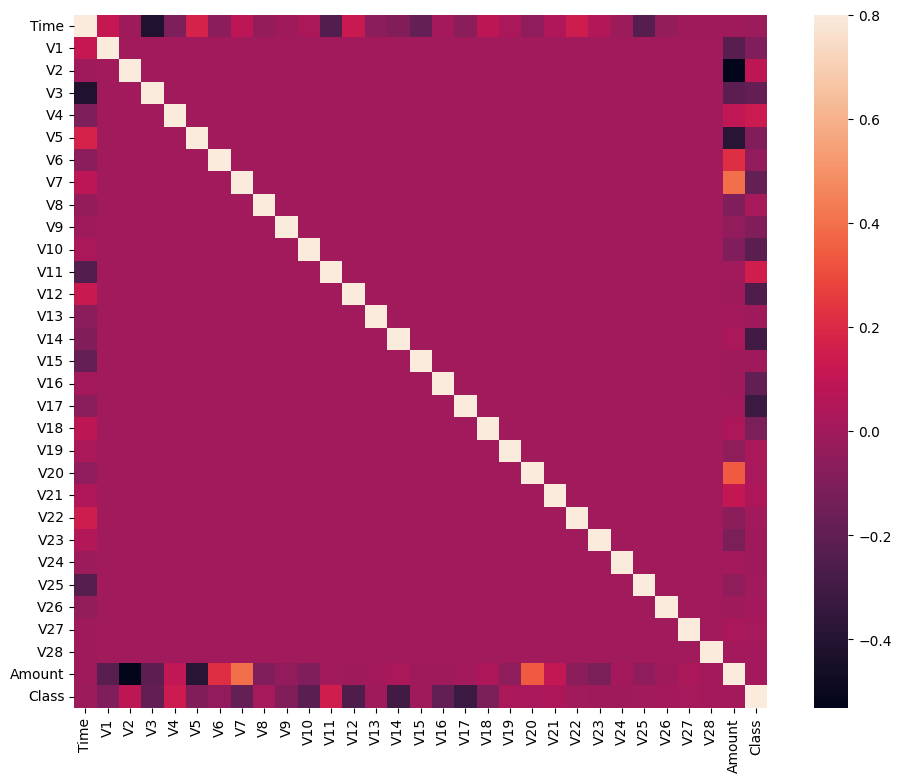

In [9]:
# Correlation matrix
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

<h3>Splitng of Data</h3>

In [10]:
x=dataset.iloc[:,:-1]
y=dataset["Class"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

<h3>Model Selection</h3>

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
print(cross_val_score(BernoulliNB(),x,y,cv=5))

[0.99877111 0.99949089 0.9989642  0.99917487 0.99919243]


In [14]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
model2=BernoulliNB()
model2.fit(x_train,y_train)

BernoulliNB()

In [16]:
print(model.score(x_test,y_test)*100, model.score(x_train,y_train)*100)
print(model2.score(x_test,y_test)*100, model2.score(x_train,y_train)*100)


99.9561107063543 100.0
99.91661034207316 99.912806348166


<h3>Confustion Matrix</h3>

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
prd=model.predict(x_test)
prd2=model2.predict(x_test)

print(classification_report(y_test,prd))
print(classification_report(y_test,prd2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.92      0.81      0.86       191

    accuracy                           1.00    113923
   macro avg       0.96      0.90      0.93    113923
weighted avg       1.00      1.00      1.00    113923

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.81      0.66      0.73       191

    accuracy                           1.00    113923
   macro avg       0.90      0.83      0.86    113923
weighted avg       1.00      1.00      1.00    113923



Text(0.5, 23.52222222222222, 'Predicted class')

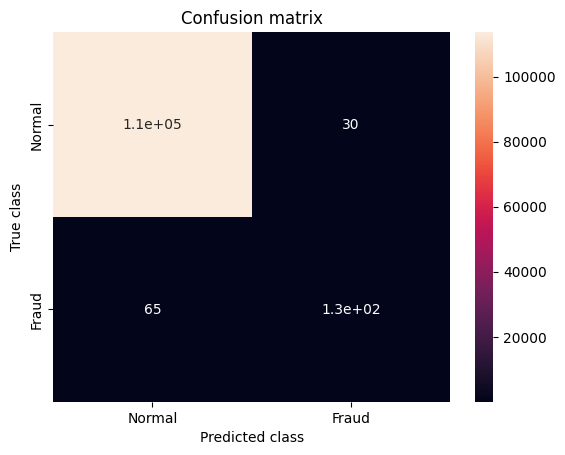

In [18]:
# For BernoulliNb
cd=confusion_matrix(y_test,prd2)
LABELS = ['Normal', 'Fraud']
sns.heatmap(cd,annot=True,xticklabels = LABELS, 
            yticklabels = LABELS)
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 23.52222222222222, 'Predicted class')

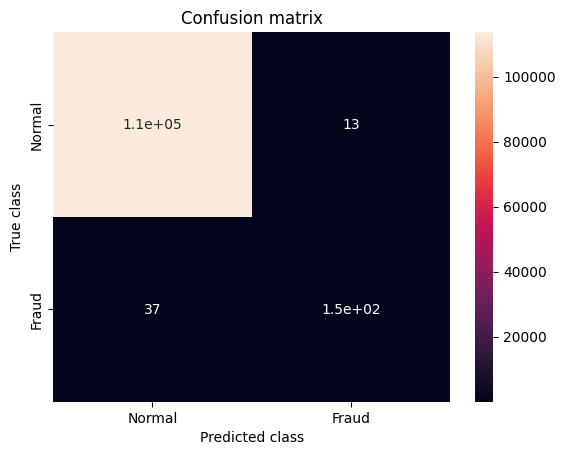

In [19]:
# For Random Forest Classifier
cd=confusion_matrix(y_test,prd)
LABELS = ['Normal', 'Fraud']
sns.heatmap(cd,annot=True,xticklabels = LABELS, 
            yticklabels = LABELS)
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [20]:
print("Due to classification report and confustion matrix we will choose The Random Forest Classifier with score:",model.score(x_test,y_test)*100)

Due to classification report and confustion matrix we will choose The Random Forest Classifier with score: 99.9561107063543
